* [0. Importar libreríass](#section_0)
* [1. EDA](#section_1)
    * [1.1. Distribución de los datos](#section_2_1)


## 0. Imports <a class="anchor" id="section_0"></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
from google.colab import drive
drive.mount('/content/drive')
!rm -rf sample_data/

Mounted at /content/drive


## 1. EDA <a class="anchor" id="section_1"></a>

In [6]:
H1_code = '/content/drive/MyDrive/TFM-data/OMNI2_H0_MRG1HR.csv'

In [8]:
data_updated = pd.read_csv(H1_code, parse_dates=["Datetime"])

data_updated_head = data_updated.head()
data_updated_info = data_updated.info()
data_updated_description = data_updated.describe()

data_updated_head, data_updated_info, data_updated_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122712 entries, 0 to 122711
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID_IMF         122712 non-null  float64       
 1   ID_plasma      122586 non-null  float64       
 2   Bmag           122712 non-null  float64       
 3   dev_Bmag       122712 non-null  float64       
 4   Bx             122712 non-null  float64       
 5   By_gse         122712 non-null  float64       
 6   Bz_gse         122712 non-null  float64       
 7   By_gsm         122712 non-null  float64       
 8   Bz_gsm         122712 non-null  float64       
 9   dev_Bx         122712 non-null  float64       
 10  dev_By         122712 non-null  float64       
 11  dev_Bz         122712 non-null  float64       
 12  P_density      119308 non-null  float64       
 13  dev_P_density  119308 non-null  float64       
 14  AP             108014 non-null  float64       
 15  

(   ID_IMF  ID_plasma  Bmag  dev_Bmag   Bx  By_gse  Bz_gse  By_gsm  Bz_gsm  \
 0    71.0       71.0   4.6       0.4 -3.8     1.7    -1.2     2.0    -0.7   
 1    71.0       71.0   3.5       0.1 -3.1     0.7    -1.4     1.0    -1.2   
 2    71.0       71.0   3.9       0.3 -3.4     0.5    -1.8     0.9    -1.7   
 3    71.0       71.0   3.6       0.3 -3.0     0.7    -1.8     1.0    -1.7   
 4    71.0       71.0   3.1       0.2 -2.4     1.2    -1.4     1.3    -1.3   
 
    dev_Bx  ...  P_density  dev_P_density     AP  dev_AP  E_field  plasma_T  \
 0     0.5  ...        NaN            NaN  0.015   0.001     0.20       NaN   
 1     0.1  ...        NaN            NaN  0.015   0.002     0.35       NaN   
 2     0.2  ...        NaN            NaN  0.012   0.001     0.49       NaN   
 3     0.2  ...        NaN            NaN  0.012   0.002     0.49       NaN   
 4     0.3  ...        NaN            NaN  0.012   0.001     0.37       NaN   
 
    dev_plasma_T  plasma_V  Dst            Datetime  


### 1.1. Distribución de los datos <a class="anchor" id="section_1_1"></a>

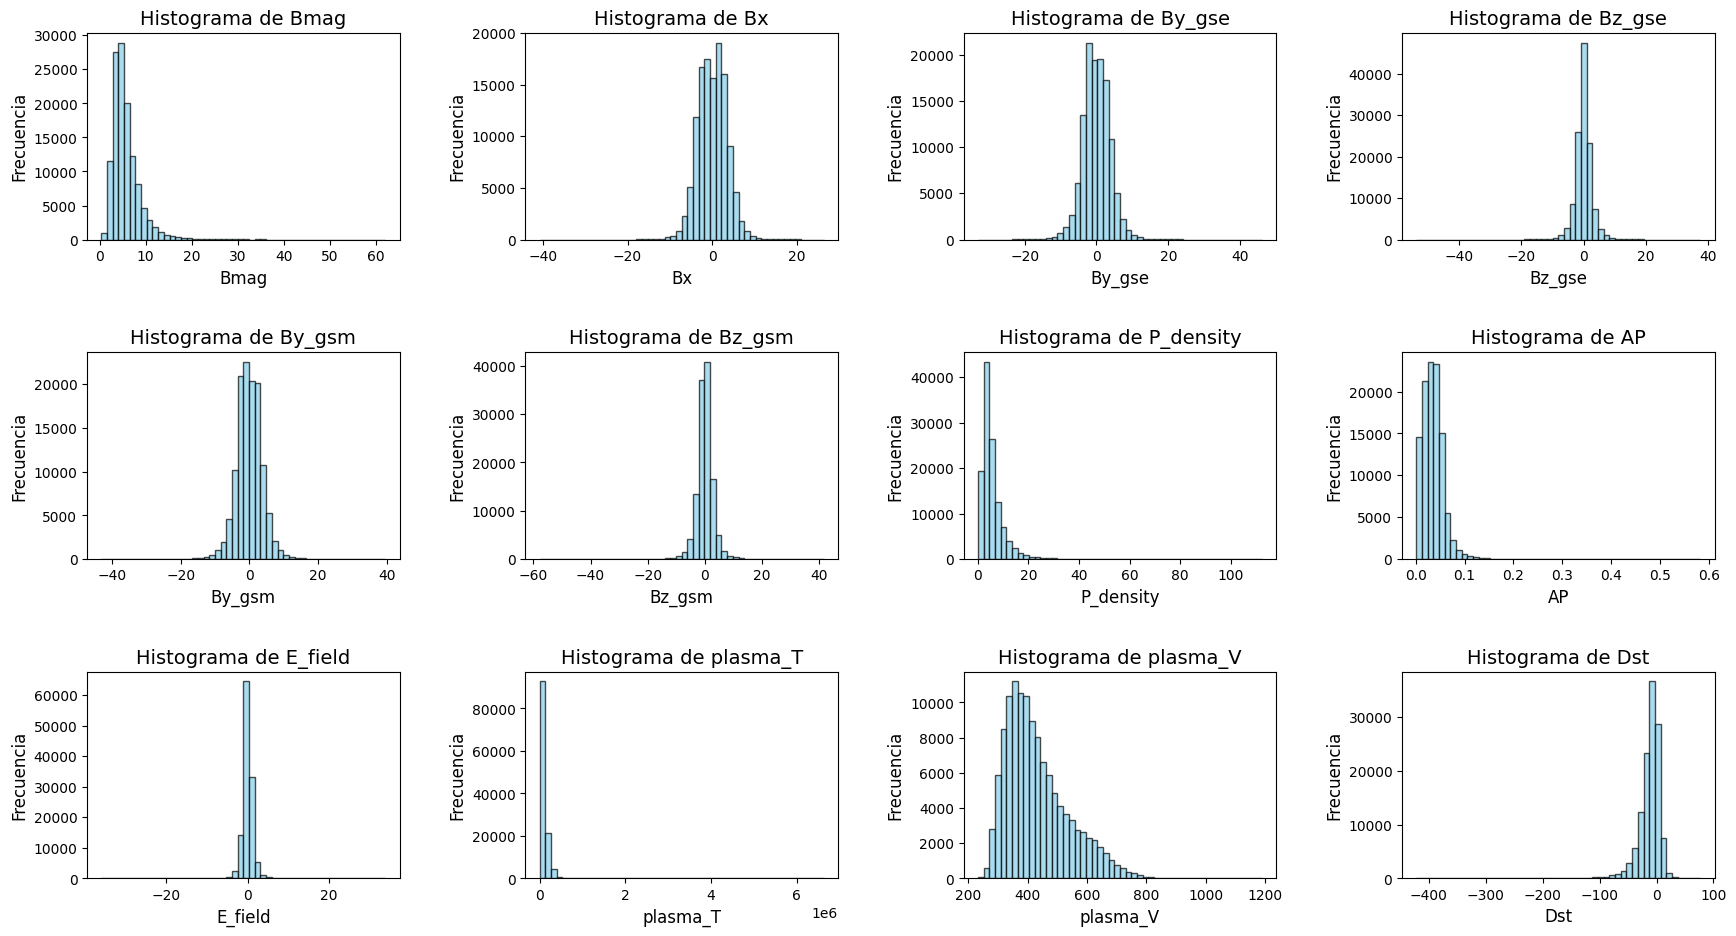

In [15]:
import matplotlib.pyplot as plt

# Configuración del tamaño de la figura para las visualizaciones
plt.figure(figsize=(18, 10))  # Más apaisado y bonito

# Definición de las variables a graficar (excluyendo las que empiezan con dev_ y ID_)
variables = [
    'Bmag', 'Bx', 'By_gse', 'Bz_gse', 'By_gsm', 'Bz_gsm',
    'P_density', 'AP', 'E_field', 'plasma_T', 'plasma_V', 'Dst'
]

# Determinación del número de filas y columnas basado en la cantidad de variables
n_rows = 3
n_cols = 4

# Creación de los histogramas
for i, var in enumerate(variables):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(data_updated[var], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

plt.tight_layout(pad=3.0)

plt.show()


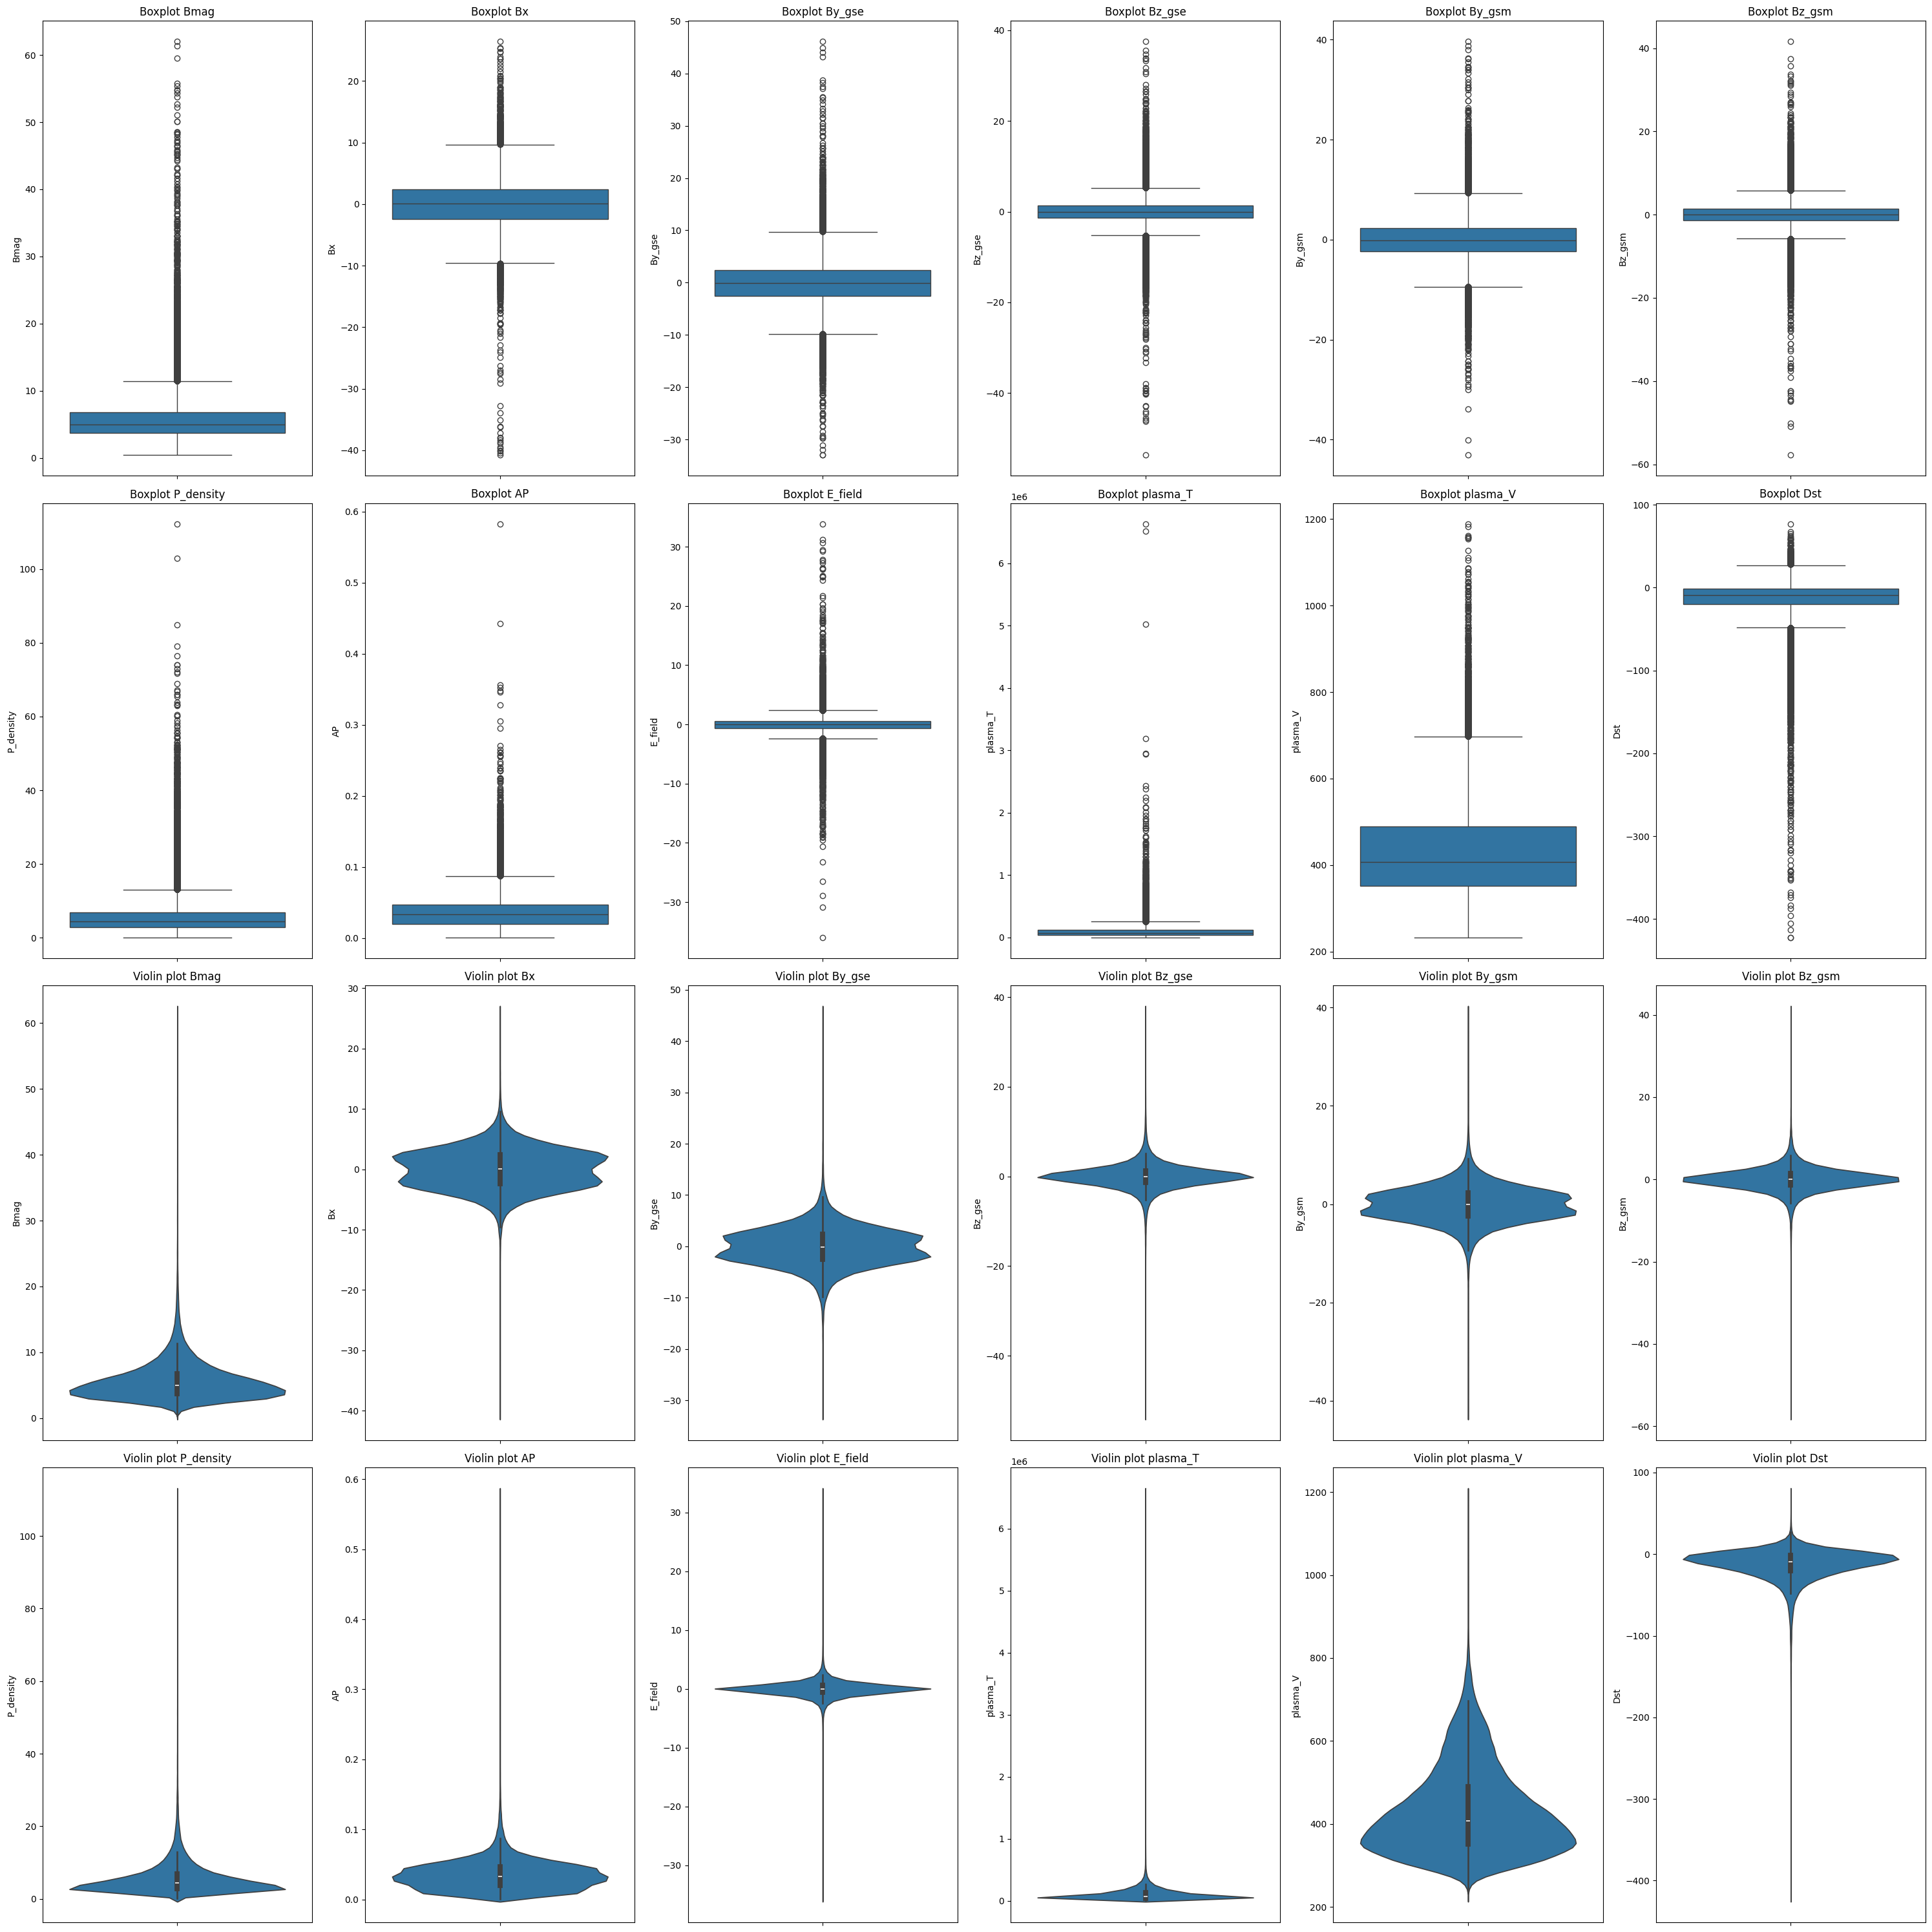

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_updated = pd.read_csv(H1_code, parse_dates=["Datetime"])

variables_to_plot = [
    'Bmag', 'Bx', 'By_gse', 'Bz_gse', 'By_gsm', 'Bz_gsm',
    'P_density', 'AP', 'E_field', 'plasma_T', 'plasma_V', 'Dst'
]

data = data_updated

# Crear boxplots y violin plots para estas variables en una sola figura

fig, axes = plt.subplots(4, 6, figsize=(30, 30))

for i, var in enumerate(variables_to_plot):
    row, col = divmod(i, 6)

    # Boxplot
    sns.boxplot(y=data[var], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot {var}')

    # Violin plot
    sns.violinplot(y=data[var], ax=axes[row+2, col])
    axes[row+2, col].set_title(f'Violin plot {var}')

plt.tight_layout()
plt.show()
